### Q2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('./diabetes.csv')

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
np.random.seed(13)


# Sample 25 observations
sample = data.sample(25)

In [9]:
sample_mean_glucose = sample["Glucose"].mean()
sample_max_glucose = sample["Glucose"].max()

In [12]:
population_mean_glucose = data["Glucose"].mean()
population_max_glucose = data["Glucose"].max()

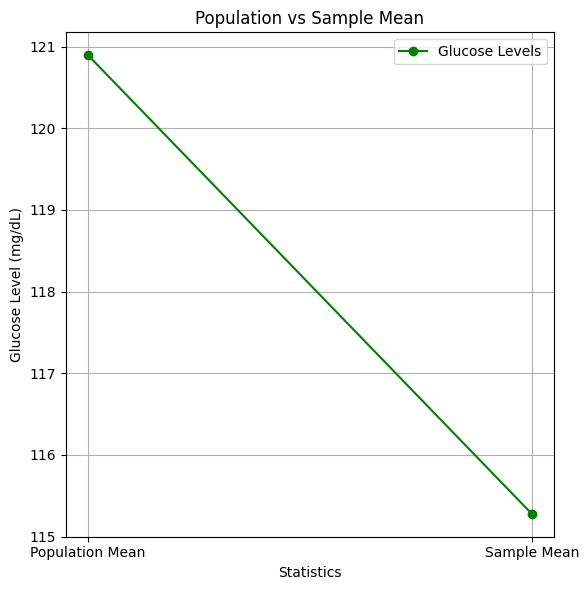

In [22]:
categories = ['Population Mean', 'Sample Mean']
values = [population_mean_glucose,sample_mean_glucose]
plt.figure(figsize=(6, 6))
plt.plot(categories, values, marker='o', linestyle='-', color='green', label='Glucose Levels')
plt.xlabel('Statistics')
plt.ylabel('Glucose Level (mg/dL)')
plt.title('Population vs Sample Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

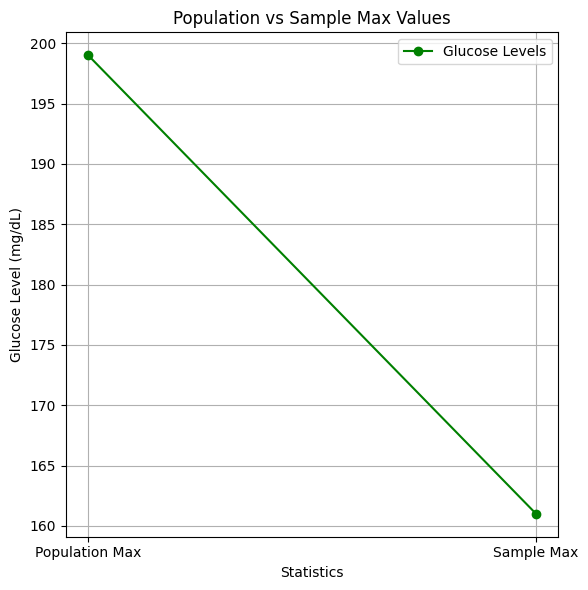

In [23]:
categories = ['Population Max', 'Sample Max']
values = [population_max_glucose,sample_max_glucose]
plt.figure(figsize=(6, 6))
plt.plot(categories, values, marker='o', linestyle='-', color='green', label='Glucose Levels')
plt.xlabel('Statistics')
plt.ylabel('Glucose Level (mg/dL)')
plt.title('Population vs Sample Max Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
sample_98th_bmi = np.percentile(sample["BMI"], 98)
population_98th_bmi = np.percentile(data["BMI"], 98)

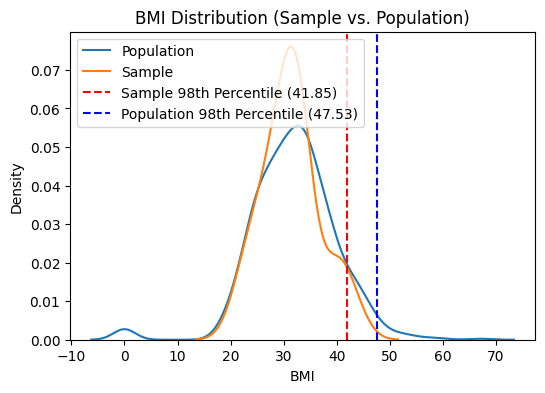

In [16]:
# kde plot comparing 98th percentile of sample and population data.
# Higher values of density indicate a higher probability of finding data points at that specific BMI value.

plt.figure(figsize=(6, 4))
sns.kdeplot(data["BMI"], label="Population")
sns.kdeplot(sample["BMI"], label="Sample")
plt.axvline(sample_98th_bmi, color="red", linestyle="--", label=f"Sample 98th Percentile ({sample_98th_bmi:.2f})")
plt.axvline(population_98th_bmi, color="blue", linestyle="--", label=f"Population 98th Percentile ({population_98th_bmi:.2f})")
plt.title("BMI Distribution (Sample vs. Population)")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()

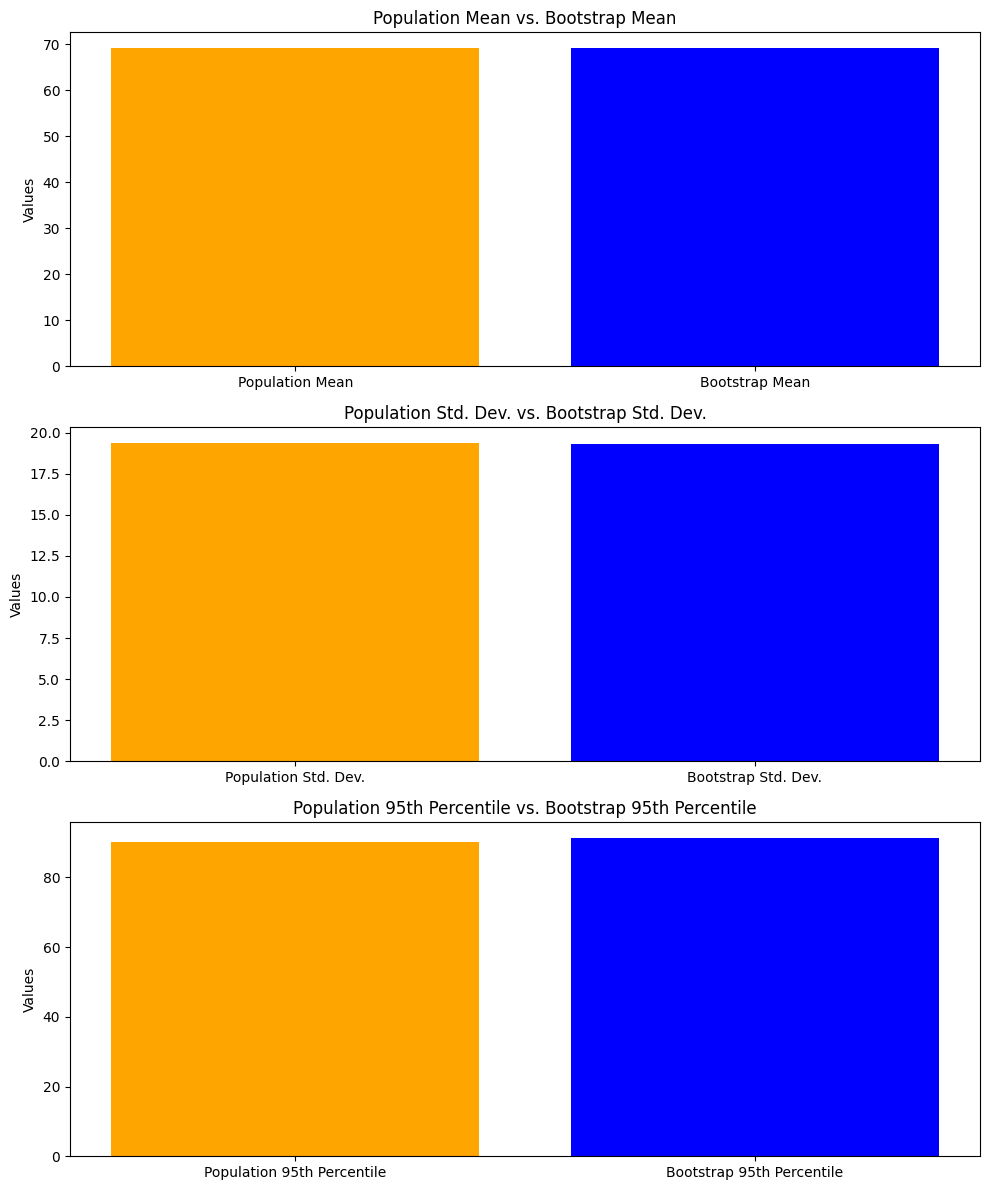

Population Mean Blood Pressure: 69.11
Population Standard Deviation Blood Pressure: 19.36
Population 95th Percentile Blood Pressure: 90.00

Bootstrap Mean Blood Pressure (average of 500 means): 69.12
Bootstrap Standard Deviation Blood Pressure (std of 500 means): 19.31
Bootstrap 95th Percentile Blood Pressure (average of 500 percentiles): 91.19


In [17]:

# Bootstrap parameters
bootstrap_samples = 500
sample_size = 150

# Arrays to store bootstrap statistics
bootstrap_mean_samples = np.zeros(bootstrap_samples)
bootstrap_std_samples = np.zeros(bootstrap_samples)
bootstrap_95th_percentiles = np.zeros(bootstrap_samples)

# Calculate population statistics
population_mean = data["BloodPressure"].mean()
population_std_dev = data["BloodPressure"].std()
population_95th_percentile = np.percentile(data["BloodPressure"], 95)

# Generate bootstrap samples
for i in range(bootstrap_samples):
    bootstrap_sample = data["BloodPressure"].sample(sample_size, replace=True)
    bootstrap_mean_samples[i] = bootstrap_sample.mean()
    bootstrap_std_samples[i] = bootstrap_sample.std()
    bootstrap_95th_percentiles[i] = np.percentile(bootstrap_sample, 95)

# Overall bootstrap statistics
bmean = np.mean(bootstrap_mean_samples)
bsd = np.mean(bootstrap_std_samples)
bp95 = np.mean(bootstrap_95th_percentiles)

# Create comparison chart
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].bar(["Population Mean", "Bootstrap Mean"], [population_mean, bmean], color=["orange", "blue"])
axs[0].set_ylabel("Values")
axs[0].set_title("Population Mean vs. Bootstrap Mean")

axs[1].bar(["Population Std. Dev.", "Bootstrap Std. Dev."], [population_std_dev, bsd], color=["orange", "blue"])
axs[1].set_ylabel("Values")
axs[1].set_title("Population Std. Dev. vs. Bootstrap Std. Dev.")

axs[2].bar(["Population 95th Percentile", "Bootstrap 95th Percentile"], [population_95th_percentile, bp95], color=["orange", "blue"])
axs[2].set_ylabel("Values")
axs[2].set_title("Population 95th Percentile vs. Bootstrap 95th Percentile")

plt.tight_layout()
plt.show()

# Report findings (consider adding these comments to your code)
print(f"Population Mean Blood Pressure: {population_mean:.2f}")
print(f"Population Standard Deviation Blood Pressure: {population_std_dev:.2f}")
print(f"Population 95th Percentile Blood Pressure: {population_95th_percentile:.2f}")
print(f"\nBootstrap Mean Blood Pressure (average of 500 means): {bmean:.2f}")
print(f"Bootstrap Standard Deviation Blood Pressure (std of 500 means): {bsd:.2f}")
print(f"Bootstrap 95th Percentile Blood Pressure (average of 500 percentiles): {bp95:.2f}")